In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../artifacts/hotel_bookings.csv')

In [8]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [9]:
## Data Preprocessing

In [10]:
data.shape

(119390, 32)

In [11]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
columns_to_drop = ['hotel', 'lead_time', 'adults', 'children', 'babies', 'country', 'market_segment',
                    'distribution_channel', 'previous_bookings_not_canceled', 'assigned_room_type', 
                    'deposit_type', 'agent', 'company', 'adr', 'reservation_status_date']

In [13]:
data = data.drop(columns=columns_to_drop)

In [14]:
data

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,2015,July,27,1,0,0,BB,0,0,C,3,0,Transient,0,0,Check-Out
1,0,2015,July,27,1,0,0,BB,0,0,C,4,0,Transient,0,0,Check-Out
2,0,2015,July,27,1,0,1,BB,0,0,A,0,0,Transient,0,0,Check-Out
3,0,2015,July,27,1,0,1,BB,0,0,A,0,0,Transient,0,0,Check-Out
4,0,2015,July,27,1,0,2,BB,0,0,A,0,0,Transient,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,2017,August,35,30,2,5,BB,0,0,A,0,0,Transient,0,0,Check-Out
119386,0,2017,August,35,31,2,5,BB,0,0,E,0,0,Transient,0,2,Check-Out
119387,0,2017,August,35,31,2,5,BB,0,0,D,0,0,Transient,0,4,Check-Out
119388,0,2017,August,35,31,2,5,BB,0,0,A,0,0,Transient,0,0,Check-Out


In [15]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)

In [16]:
meal_mapping = {
    'BB': 1,
    'FB': 2,
    'HB': 3,
    'SC': 4,
    'Undefined': 0
}

data['meal'] = data['meal'].map(meal_mapping)

In [17]:
room_type_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'L': 9,
    'P': 10
}

data['reserved_room_type'] = data['reserved_room_type'].map(room_type_mapping)

In [18]:
customer_type_mapping = {
    'Transient': 1,
    'Contract': 2,
    'Transient-Party': 3,
    'Group': 4
}

data['customer_type'] = data['customer_type'].map(customer_type_mapping)

In [19]:
reservation_status_mapping = {
    'Check-Out': 1,
    'Canceled': 2,
    'No-Show': 3
}

data['reservation_status'] = data['reservation_status'].map(reservation_status_mapping)

In [20]:
data

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,2015,7,27,1,0,0,1,0,0,3,3,0,1,0,0,1
1,0,2015,7,27,1,0,0,1,0,0,3,4,0,1,0,0,1
2,0,2015,7,27,1,0,1,1,0,0,1,0,0,1,0,0,1
3,0,2015,7,27,1,0,1,1,0,0,1,0,0,1,0,0,1
4,0,2015,7,27,1,0,2,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,2017,8,35,30,2,5,1,0,0,1,0,0,1,0,0,1
119386,0,2017,8,35,31,2,5,1,0,0,5,0,0,1,0,2,1
119387,0,2017,8,35,31,2,5,1,0,0,4,0,0,1,0,4,1
119388,0,2017,8,35,31,2,5,1,0,0,1,0,0,1,0,0,1


In [22]:
X = data.drop(columns = 'is_canceled')
y = data['is_canceled']

In [23]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [26]:
X_train.shape

(95512, 16)

In [27]:
X_test.shape

(23878, 16)

In [28]:
y_train.value_counts()

is_canceled
0    60243
1    35269
Name: count, dtype: int64

In [29]:
y_test.value_counts()

is_canceled
0    14923
1     8955
Name: count, dtype: int64

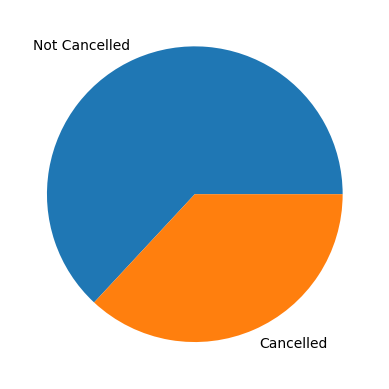

In [30]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels= ['Not Cancelled', 'Cancelled'])
plt.show()

In [32]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 495.5 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 469.7 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 656.4 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 751.6 kB/s eta 0:00:01
   --------------------------------- ---- 204.8/235.6 kB 778.2 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 802.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(120486, 16) (120486,)


In [35]:
y_train_smote.value_counts()

is_canceled
1    60243
0    60243
Name: count, dtype: int64

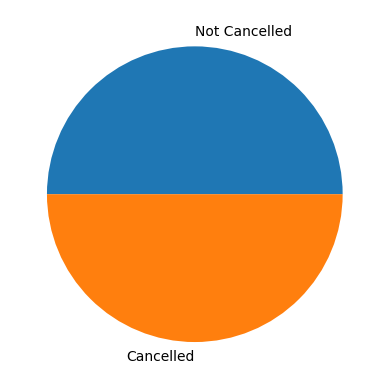

In [36]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels= ['Not Cancelled', 'Cancelled'])
plt.show()

In [37]:
## scalling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [40]:
## modelling

In [44]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_score (y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f"Training score: Accuracy: {acc},\n Precision: {pr},\nRecall: {rec} ,\nF1 Score: {f1}")

def testing_score (y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f"Testing score: Accuracy: {acc},\n Precision: {pr},\nRecall: {rec} ,\nF1 Score: {f1}")

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train_smote_scaled, y_train_smote)

LogisticRegression()

In [53]:
y_train_pred = log_reg.predict(X_train_smote_scaled)

In [54]:
y_train_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
training_score (y_train_smote,y_train_pred)

Training score: Accuracy: 1.0,
 Precision: 1.0,
Recall: 1.0 ,
F1 Score: 1.0


In [56]:
y_test_pred = log_reg.predict(X_test_scaled)

In [57]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
testing_score (y_test,y_test_pred)

Testing score: Accuracy: 1.0,
 Precision: 1.0,
Recall: 1.0 ,
F1 Score: 1.0


In [60]:
svm = SVC()
svm.fit(X_train_smote_scaled, y_train_smote)

SVC()

In [61]:
y_train_pred = svm.predict(X_train_smote_scaled)

In [62]:
y_train_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
training_score (y_train_smote,y_train_pred)

Training score: Accuracy: 1.0,
 Precision: 1.0,
Recall: 1.0 ,
F1 Score: 1.0


In [64]:
y_test_pred = svm.predict(X_test_scaled)

In [65]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [66]:
testing_score (y_test,y_test_pred)

Testing score: Accuracy: 1.0,
 Precision: 1.0,
Recall: 1.0 ,
F1 Score: 1.0


In [67]:
import pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(log_reg, file)